# Neural Network from Scratch
# Practical 3A

In [3]:
# creating the base layer

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass

In [4]:
# creating the Dense layer

import numpy as np

class Layer_Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size,input_size)
        self.biases = np.random.randn(output_size,1)
        print ("Weights:",self.weights)

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input ) + self.biases

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient,self.input.T )
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.biases -=learning_rate * output_gradient
        return input_gradient

In [5]:
# creating the activation layer

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [6]:
# creating the activation functions

# Tanh function
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)
        
        def tanh_prime(x):
            return 1 - np.tanh(x)**2
        
        super().__init__(tanh, tanh_prime)

class Linear(Activation):
    def __init__(self):
        def linear(x):
            return x
        
        def linear_prime(x):
            return 1
        
        super().__init__(linear, linear_prime)


In [7]:
# creating the loss function

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# creating the loss function derivative

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

In [8]:

# creating the neural network

# X = np.reshape(([-1,-1],[-1,1],[1,-1],[1,1]),(4,2,1))
# Y = np.reshape(([-1],[1],[1],[-1]),(4,1,1))

X = np.array([[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7]])
Y = np.array([[1.2],[1.4],[1.55],[1.75],[2.01],[2.2],[2.35]])

network = [
    Layer_Dense(1, 1),
    Linear()
    
]

epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    error = 0
    for x, y in zip(X, Y):
        # Forward pass
        output = x
        for layer in network:
            output = layer.forward(output)

        error += mse(y, output)
        # Backward pass
        output_gradient = mse_prime(y, output)
        for layer in reversed(network):
            output_gradient = layer.backward(output_gradient, learning_rate)

        print("Epoch",epoch,"Error",error)

    
error/= len (X)
print("Final error: ",error)

Weights: [[0.46227329]]
Epoch 0 Error 0.3195782416308695
Epoch 0 Error 0.6841061109753528
Epoch 0 Error 1.018659676401597
Epoch 0 Error 1.377544660313202
Epoch 0 Error 1.815854649843109
Epoch 0 Error 2.202590483541506
Epoch 0 Error 2.4841376862639
Epoch 1 Error 0.09013563452678611
Epoch 1 Error 0.10418439880728228
Epoch 1 Error 0.10468377890352555
Epoch 1 Error 0.11553846504308019
Epoch 1 Error 0.183577149971543
Epoch 1 Error 0.2759024706995514
Epoch 1 Error 0.35757057086026156
Epoch 2 Error 0.17041812857300348
Epoch 2 Error 0.2179554405023062
Epoch 2 Error 0.23014589178255956
Epoch 2 Error 0.23085299170997414
Epoch 2 Error 0.2681567047626758
Epoch 2 Error 0.3284978692328223
Epoch 2 Error 0.38451032050603456
Epoch 3 Error 0.1689375090806106
Epoch 3 Error 0.218508293817533
Epoch 3 Error 0.2329311479988185
Epoch 3 Error 0.23310134001015204
Epoch 3 Error 0.26438610041102434
Epoch 3 Error 0.31625312294500896
Epoch 3 Error 0.36384311633588456
Epoch 4 Error 0.1541803634487995
Epoch 4 Error 0

In [9]:
# testing the neural network

input_arr = np.array([[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7]])
output_arr = np.array([[1.2],[1.4],[1.55],[1.75],[2.01],[2.2],[2.35]])

for x, y in zip(input_arr, output_arr):
    output = x
    for layer in network:
        
        output = layer.forward(output)
    print("Input:",x,"Output:",output,"Actual:",y)
   


Input: [0.1] Output: [[1.19031205]] Actual: [1.2]
Input: [0.2] Output: [[1.386833]] Actual: [1.4]
Input: [0.3] Output: [[1.58335395]] Actual: [1.55]
Input: [0.4] Output: [[1.7798749]] Actual: [1.75]
Input: [0.5] Output: [[1.97639585]] Actual: [2.01]
Input: [0.6] Output: [[2.1729168]] Actual: [2.2]
Input: [0.7] Output: [[2.36943775]] Actual: [2.35]


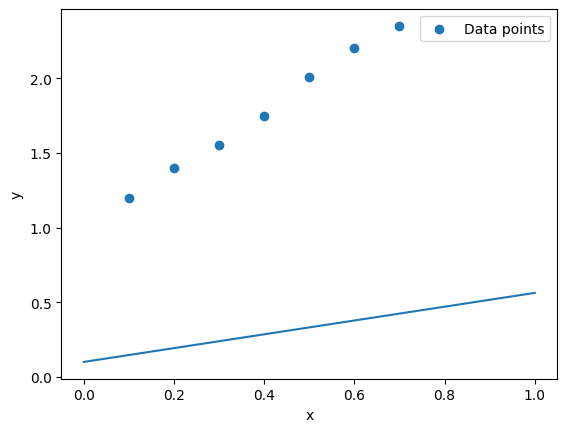

In [17]:
# Plotting

import matplotlib.pyplot as plt

input_arr = np.array([[0.1],[0.2],[0.3],[0.4],[0.5],[0.6],[0.7]])
output_arr = np.array([[1.2],[1.4],[1.55],[1.75],[2.01],[2.2],[2.35]])



m = 0.46227329
x = np.linspace(0, 1, 10)
y = m*x + 0.1

plt.plot(x, y)
plt.scatter(input_arr, output_arr, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()